In [2]:
import pandas as pd
import numpy as np

from sklearn import datasets

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/자진프/final_clusters.csv", index_col=0)
df.head()

Mounted at /content/drive


,자치구,노인인구수,역개수,무료급식소개수,시설개수
0,종로구,27704,15,5,8
1,중구,24660,23,2,11
2,용산구,38478,10,3,7
3,성동구,47530,14,5,19
4,광진구,53737,11,2,22


In [3]:
import pandas as pd
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,494 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120895 files and dire

In [4]:
df["평균소득"] = [5500.653548,5987.035233,5550.348108,4731.800000,5643.548667,
              3750.812000,3855.080000,3950.206275,3587.515714,3728.169286,
              3808.196842,4255.108125,4359.313846,5402.360244,4539.065556,
              5025.340909,3995.732222,4208.728000,4277.224186,5343.321667,
              5059.693333,10494.490000,12300.953548,7312.896071,6056.718947]
df

,자치구,노인인구수,역개수,무료급식소개수,시설개수,평균소득
0,종로구,27704,15,5,8,5500.653548
1,중구,24660,23,2,11,5987.035233
2,용산구,38478,10,3,7,5550.348108
3,성동구,47530,14,5,19,4731.800000
4,광진구,53737,11,2,22,5643.548667
5,동대문구,64255,6,2,35,3750.812000
6,중랑구,74790,8,11,48,3855.080000
7,성북구,77293,9,11,28,3950.206275
8,강북구,66170,3,11,35,3587.515714
9,도봉구,66942,3,0,29,3728.169286


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

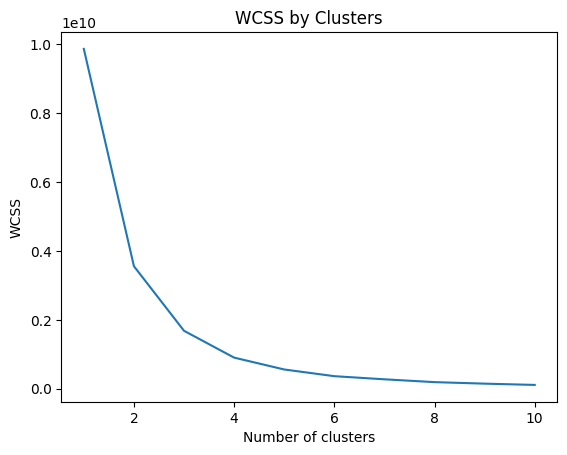

In [5]:
#importing the libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

X = df.drop(columns='자치구')
X.head()

# Create 10 models with 1 to 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    # Fit the data points
    kmeans.fit(X.values)
    # Get the WCSS (inertia) value
    wcss.append(kmeans.inertia_)

#Plot the WCSS values onto a line graph
plt.plot(range(1, 11), wcss)
plt.title('WCSS by Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [6]:
from sklearn.cluster import KMeans

# Create a model based on 3 centroids
model = KMeans(n_clusters=3,random_state=0)

# Fit to the data and predict the cluster assignments for each data point
km_clusters = model.fit_predict(X)

# Assign the cluster
X_withCluster = X.copy()
X_withCluster['km_clusters'] = km_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [7]:
from sklearn.cluster import AgglomerativeClustering

agg_model = AgglomerativeClustering(n_clusters=3, linkage='average')
agg_clusters = agg_model.fit_predict(X)

X_withCluster['agg_clusters'] = agg_clusters

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

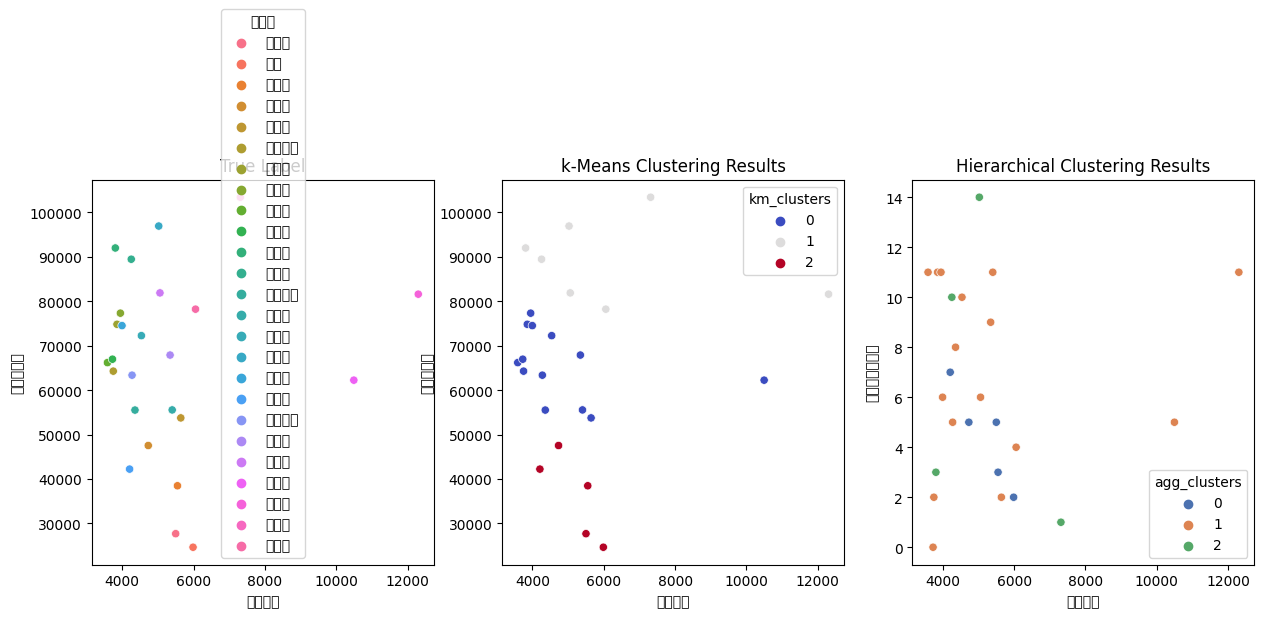

In [8]:
import seaborn as sns

plt.rc('font', family='NanumBarunGothic')

fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x='평균소득', y='노인인구수', data=df, hue='자치구',
          ax=ax[0])
sns.scatterplot(x='평균소득', y='노인인구수', data=X_withCluster, hue='km_clusters',
           palette='coolwarm', ax=ax[1])
sns.scatterplot(x='평균소득', y='무료급식소개수', data=X_withCluster, hue='agg_clusters',
           palette='deep', ax=ax[2])
ax[0].set(title='True Label')
ax[1].set(title='k-Means Clustering Results')
ax[2].set(title='Hierarchical Clustering Results')

plt.show()